In [1]:
# Import Libaries
import workshop_library as wl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fontsize=20
from workshop_library import data_manager

## Load data

In [2]:
df = wl.get_symbol('DAX')

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,6431.140137,6439.229980,6289.819824,6289.819824,6289.819824,31868400.0
2001-01-03,6284.870117,6467.819824,6172.439941,6434.959961,6434.959961,47080000.0
2001-01-04,6443.870117,6556.939941,6356.919922,6376.540039,6376.540039,71143100.0
2001-01-05,6383.330078,6485.339844,6344.160156,6382.310059,6382.310059,65345100.0
2001-01-08,6368.830078,6426.640137,6337.950195,6392.169922,6392.169922,38720900.0


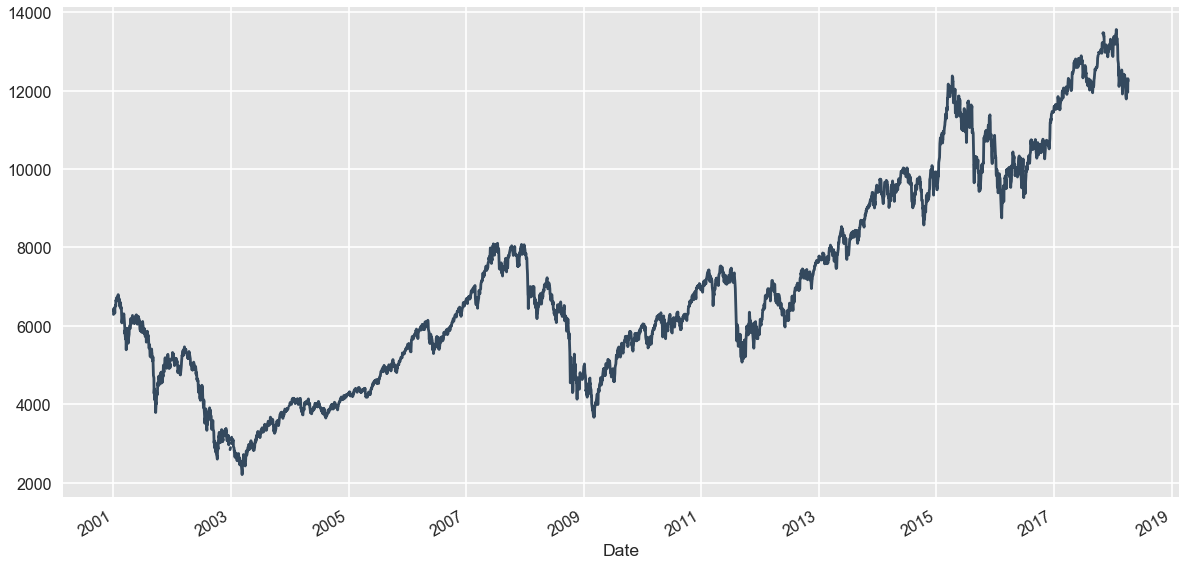

In [4]:
df['Close'].plot(figsize=(20,10));

## Build a very simple first model

### Construct a target variable

In [5]:
# Return to the next day
df['target'] = df['Close'].pct_change().shift(-1) > 0

# False means: Stock price drops the next day! 
# True means: Stock prices rises the next day!

df.dropna(inplace=True)

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,target
Date,,,,,,,
2001-01-02,6431.140137,6439.229980,6289.819824,6289.819824,6289.819824,31868400.0,True
2001-01-03,6284.870117,6467.819824,6172.439941,6434.959961,6434.959961,47080000.0,False
2001-01-04,6443.870117,6556.939941,6356.919922,6376.540039,6376.540039,71143100.0,True
2001-01-05,6383.330078,6485.339844,6344.160156,6382.310059,6382.310059,65345100.0,True
2001-01-08,6368.830078,6426.640137,6337.950195,6392.169922,6392.169922,38720900.0,True


### Define Training Sample

In [8]:
# Assign training data
df_train = df.iloc[:1000]
X_train = df_train.drop('target', axis=1)
y_train = df_train['target']

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = RandomForestClassifier(n_estimators = 1000)

### Train the Model

In [15]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Apply the model

In [53]:
# adjust the day on which the model should be applied
choose_timeseries_position = 1005

x_test = df.iloc[choose_timeseries_position][['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y_test = df.iloc[choose_timeseries_position]['target']

In [54]:
# False means: Stock price drops the next day! 
# True means: Stock prices rises the next day!

In [55]:
print(model.predict(x_test.reshape(1, -1)), y_test)

[False] True


### 1) Test model on many out of sample lines

In [56]:
x_test_many = df.iloc[1000:][['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y_test_many = df.iloc[1000:]['target']

In [57]:
predictions = model.predict(x_test_many)
predictions

array([False, False, False, ..., False, False, False])

### 2) Compare in-sample and out-of-sample model accuracy

In [59]:
# Out of Sample Prediction Quality
(predictions == y_test_many).mean()

0.4846335697399527

In [60]:
# In Sample Prediction Quality
(model.predict(X_train) == y_train).mean()

1.0